In [30]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read CSV.
df = pd.read_csv('shopping_trends.csv')

In [5]:
# View the first 10 rows of data
df.head(10)

# Get basic information about dataset
print("\nDataset Info:")
print(df.info())

missing_values = df.isnull().sum() 
print(missing_values)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3897 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3899 non-null   object 
 13  Discount Applied        3899 non-null   object 
 14  Promo Code Used         3

It is observed that some columns have one or three missing values, which is very rare for the dataset (3900), and the missing values can be deleted.

In [17]:
# Delete miss value
df_new = df.dropna()
df_new=df[df["Age"]!=0]

In [19]:
print(df_new.describe())  
print(df_new.describe(include='object'))  # View the distribution of categorical variables


       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3891.000000  3891.000000            3891.000000    3891.000000   
mean   1953.566435    44.064508              85.454382      29.449833   
std    1124.218021    15.205455            1602.333266    1603.056374   
min       2.000000    18.000000              20.000000       2.500000   
25%     981.500000    31.000000              39.000000       3.100000   
50%    1954.000000    44.000000              60.000000       3.800000   
75%    2926.500000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000           99999.000000   99999.000000   

       Previous Purchases  
count         3891.000000  
mean            76.755076  
std           2266.328404  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max          99999.000000  
       Gender Item Purchased  Category Location  Size  Color  Season  \
count    3891     

The standard deviation of Age is 15.2, which is reasonable, indicating that the age distribution is between 30 and 60 years old.
The standard deviations of Purchase Amount, previous purchases and Review Rating are very high, and there may be outliers that need to be handled.
Next, draw a box plot to determine which data points are abnormal and observe the extreme degree of the abnormal values.

In [28]:
print(plt)

<module 'matplotlib' from 'D:\\code\\python_DB_25\\.venv\\Lib\\site-packages\\matplotlib\\__init__.py'>


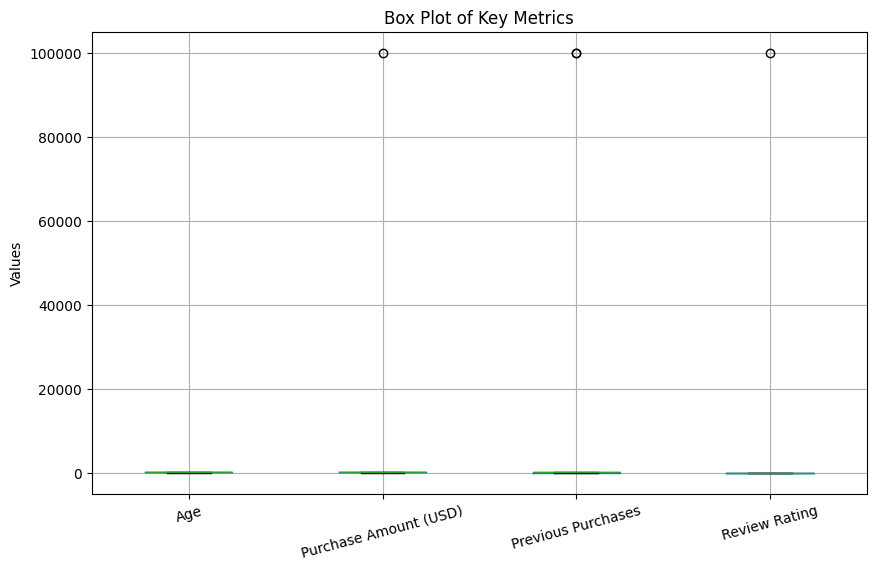

In [31]:
# 选择需要绘制箱型图的列
columns_to_plot = ["Age", "Purchase Amount (USD)", "Previous Purchases", "Review Rating"]

# 绘制箱型图
plt.figure(figsize=(10, 6))
df[columns_to_plot].boxplot()
plt.title("Box Plot of Key Metrics")
plt.ylabel("Values")
plt.xticks(rotation=15)
plt.grid(True)

# 显示图表
plt.show()


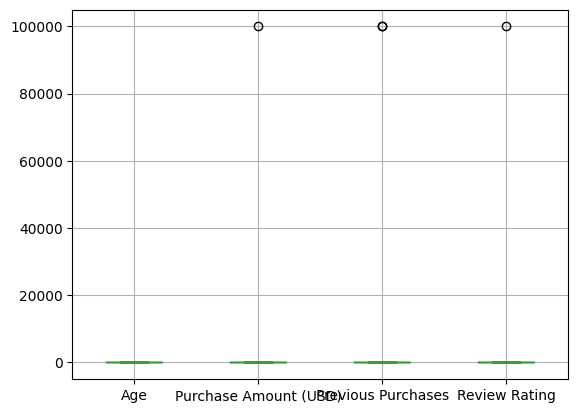

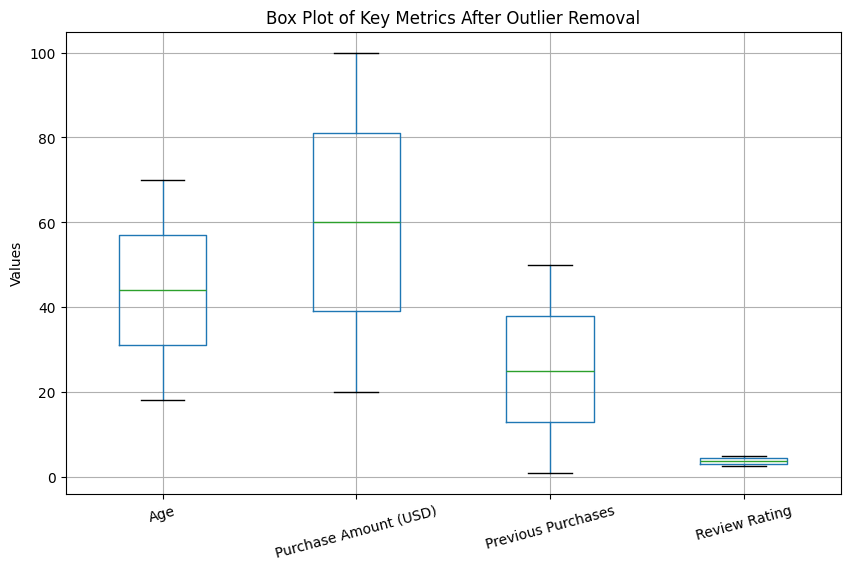

原始数据集大小: (3900, 18)
清理后的数据集大小: (3887, 18)


In [44]:
# 选择需要处理异常值的列
columns_to_plot = ["Age", "Purchase Amount (USD)", "Previous Purchases", "Review Rating"]

# 使用 pandas 的 boxplot 获取四分位数信息
boxplot_stats = df[columns_to_plot].boxplot(return_type='dict')

# 计算四分位数 Q1, Q3 和 IQR（四分位距）
Q1 = df_new[columns_to_plot].quantile(0.25)
Q3 = df_new[columns_to_plot].quantile(0.75)
IQR = Q3 - Q1

# 计算异常值的范围
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 仅保留非异常值的数据
df_cleaned = df_new[~((df_new[columns_to_plot] < lower_bound) | (df_new[columns_to_plot] > upper_bound)).any(axis=1)]

# 显示清理后数据的箱型图
plt.figure(figsize=(10, 6))
df_cleaned[columns_to_plot].boxplot()
plt.title("Box Plot of Key Metrics After Outlier Removal")
plt.ylabel("Values")
plt.xticks(rotation=15)
plt.grid(True)

# 显示图表
plt.show()

# 打印清理前后的数据大小
print(f"原始数据集大小: {df.shape}")
print(f"清理后的数据集大小: {df_cleaned.shape}")


In [45]:
print("Duplicate Rows:", df.duplicated().sum())
df = df.drop_duplicates()  # 


Duplicate Rows: 0


There are no duplicate values, which is perfect. Finally, we can start observing the data.

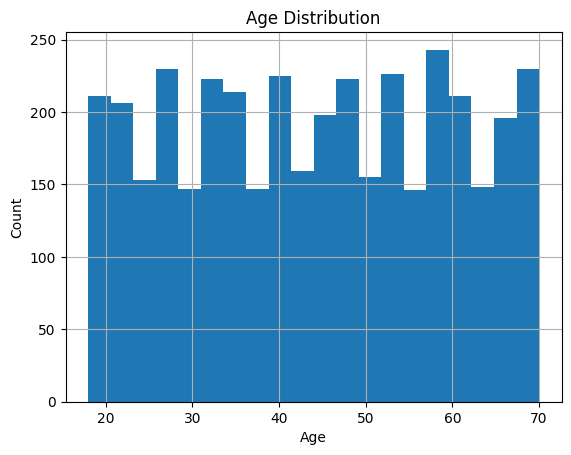

In [41]:
df_new['Age'].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

This distribution is very unnatural. I suspect this is a fake dataset.

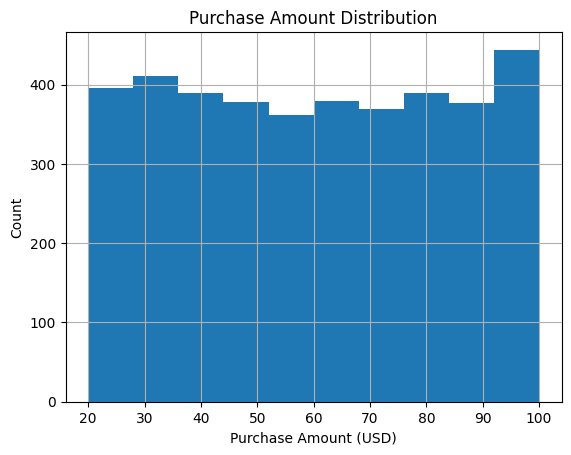

In [42]:
df_cleaned['Purchase Amount (USD)'].hist(bins=10)
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Count')
plt.title('Purchase Amount Distribution')
plt.show()


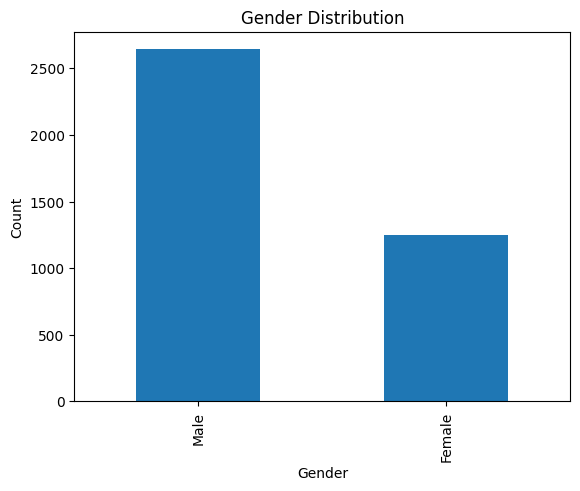

In [46]:
df_cleaned['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()
